In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,GridSearchCV
from sklearn.utils import resample

In [42]:
df=pd.read_csv("../data/athlete_events.csv")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [92]:
df["city"].nunique()

34

In [43]:
df.drop(["Team","Games","Name"], axis=1, inplace=True)

In [44]:
df.columns=df.columns.str.lower()

In [45]:
df.head(3)

,id,sex,age,height,weight,noc,year,season,city,sport,event,medal
0,1,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


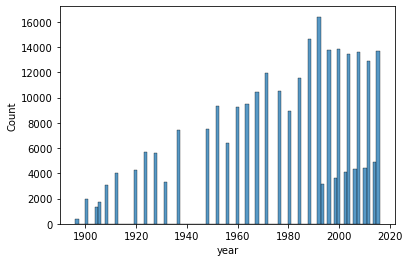

In [46]:
sns.histplot(df["year"]);

In [47]:
df=df[df["year"]>=1950]

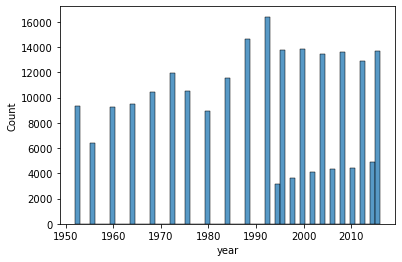

In [48]:
sns.histplot(df["year"]);

In [49]:
df["medal"]=df["medal"].fillna("No medal")

/var/folders/3n/4ywdnyms5bn5zmtm8ymmb1xw0000gn/T/ipykernel_1614/599353442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["medal"]=df["medal"].fillna("No medal")


In [53]:
df["medal"].value_counts()

No medal    194388
Bronze       10385
Gold         10120
Silver        9971
Name: medal, dtype: int64

In [81]:
df_ma=df[df["medal"]=="No medal"]
df_mi=df[df["medal"]!="No medal"]

In [83]:
df_ma_sampl=resample(df_ma,replace=False,n_samples=df_mi.shape[0], random_state=42)

In [84]:
df_down=pd.concat([df_ma_sampl,df_mi])
df_down["medal"].value_counts()

No medal    30476
Bronze      10385
Gold        10120
Silver       9971
Name: medal, dtype: int64

In [87]:
df_down["medal"].replace({"Gold":"Medal","Bronze":"Medal","Silver":"Medal"},inplace=True)

In [88]:
df_down["medal"].value_counts()

No medal    30476
Medal       30476
Name: medal, dtype: int64

In [89]:
df_down.to_csv("../data/df_2classes.csv")

In [93]:
X=df_down.drop("medal",axis=1)
y=df_down.medal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [94]:
y_train.value_counts()

Medal       21333
No medal    21333
Name: medal, dtype: int64